<a href="https://colab.research.google.com/github/chimaOkwuokei/ISEND-PAU/blob/main/ResNet50_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS**

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import pathlib

# **UNZIP DATASET**

In [63]:
# Unzip the dataset
!unzip -q ../content/longitudinal-defects.zip

# Use pathlib.Path to reference the local dataset
data = pathlib.Path('/content/longitudinal-defects')

#Get the image count
image_count = len(list(data.glob('*/*.jpg')))
print(f"Total number of images: {image_count}")

# Define image dimensions and batch size
height, width = 180, 360
training_batch_size = 32

replace longitudinal defects/Quemado/1690087_0_0_00059_1_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
Total number of images: 25


# **CREATE TRAIN AND VAL SET**

In [64]:
# Create training dataset
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  data,
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(height, width),
  batch_size=training_batch_size
)

# Print class names
image_category = train_set.class_names
print(image_category)

# Create validation dataset
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
  data,
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=training_batch_size
)


Found 25 files belonging to 3 classes.
Using 15 files for training.
['Quemado', 'Tailtip', 'V-shape']
Found 25 files belonging to 3 classes.
Using 10 files for validation.


# **MODEL ARCHITECTURE**

In [65]:
# Build the model
dnn_model = Sequential()

# Import the ResNet50 model
imported_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(height, width, 3),
    pooling='avg',
    weights='imagenet'
)

# Freeze the layers of ResNet50
for layer in imported_model.layers:
    layer.trainable = False

# Add the ResNet50 base model
dnn_model.add(imported_model)

# Add Flatten layer (not needed since pooling='avg' is used)
# dnn_model.add(Flatten())  # Not needed

# Add Dense layers
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(len(image_category), activation='softmax'))

# Print the model summary
# dnn_model.summary()

# Compile the model
dnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
dnn_model.fit(
    train_set,
    validation_data=validation_set,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.1333 - loss: 3.2174 - val_accuracy: 0.2000 - val_loss: 3.8439
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.5333 - loss: 1.7392 - val_accuracy: 0.4000 - val_loss: 5.8066
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.4667 - loss: 2.9576 - val_accuracy: 0.7000 - val_loss: 3.8826
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8667 - loss: 1.5792 - val_accuracy: 0.5000 - val_loss: 3.4554
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.8667 - loss: 1.3090 - val_accuracy: 0.4000 - val_loss: 3.0544
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.8667 - loss: 0.9763 - val_accuracy: 0.4000 - val_loss: 1.6742
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.8667 - loss: 0.3915 - val_accuracy: 0.8000 - val_loss: 0.5990
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 1.0000 - loss: 0.0319 - val_accuracy: 0.8000 - val_loss: 

# **TEST CASES**

In [54]:
# all_dents = list(data.glob('resNet50-dataset/Dents/*'))
# all_slivers= list(data.glob('Slivers/*'))

quemado = list(data.glob('Quemado/*'))
tailtip= list(data.glob('Tailtip/*'))
Vshape = list(data.glob('V-shape/*'))

/content/longitudinal-defects/V-shape/V7.jpg


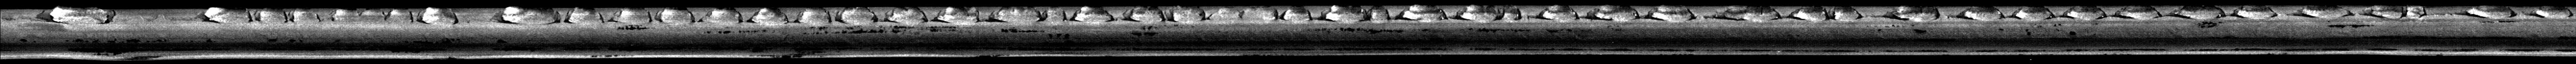

In [36]:
import PIL
import numpy as np

# print(quemado[0])
# PIL.Image.open(str(quemado[0]))

# print(tailtip[0])
# PIL.Image.open(str(tailtip[0]))

print(Vshape[0])
PIL.Image.open(str(Vshape[0]))

(1, 180, 360, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[9.9996805e-01 2.1064487e-07 3.1702890e-05]]
Predicted class: Quemado with confidence score: 1.00


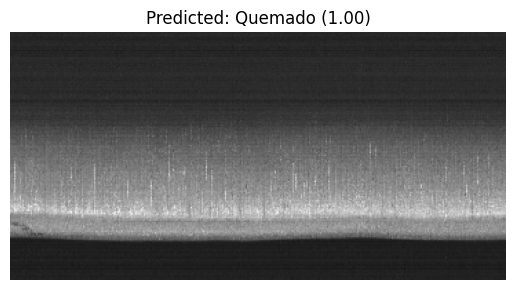

In [66]:
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming 'quemado' is a list of image file paths
# Open and display the second image using PIL



# str(quemado[2])

image_path = '/content/1841179_1_00002_2_0.jpg'
image_pil = PIL.Image.open(image_path)
image_pil.show()

# Read the first image using OpenCV
image = cv2.imread(str(quemado[2]))

# Resize the image
image_resized = cv2.resize(image, (width, height))

# Expand dimensions to match the model input shape
image = np.expand_dims(image_resized, axis=0)
print(image.shape)

# Make prediction using the model
model_pred = dnn_model.predict(image)
print(model_pred)

# Convert the predictions to class labels and get confidence score
predicted_class = np.argmax(model_pred, axis=1)[0]
confidence_score = model_pred[0][predicted_class]

# Print prediction and confidence score
print(f"Predicted class: {image_category[predicted_class]} with confidence score: {confidence_score:.2f}")

# Display the image with prediction and confidence score using matplotlib
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {image_category[predicted_class]} ({confidence_score:.2f})")
plt.axis('off')
plt.show()
